In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [10]:
with open('dataLarge.npy', 'rb') as f:
    data = np.load(f)
    dataLabels = np.load(f)
testData = data[math.floor(len(data)*0.8):]
data = data[:math.floor(len(data)*0.8)]
testDataLabels = dataLabels[math.floor(len(dataLabels)*0.8):]
dataLabels = dataLabels[:math.floor(len(dataLabels)*0.8)]
dataset = tensorflow.data.Dataset.from_tensor_slices((data, dataLabels))
len(data)

20000000

In [3]:
model = Sequential()
model.add(Dense(12, input_shape=(2,), kernel_initializer='normal', activation='relu'))
model.add(Dense(16, activation='sigmoid', kernel_initializer='normal'))
model.add(Dense(4, activation='sigmoid', kernel_initializer='normal'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 388
Trainable params: 388
Non-trainable params: 0
_________________________________________________________________


In [4]:
optimizer=tensorflow.keras.optimizers.RMSprop() 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) 
history = model.fit(data, dataLabels, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
200000/200000 [==============================] - 173s 856us/step - loss: 0.0137 - binary_accuracy: 0.9951
Epoch 2/10
200000/200000 [==============================] - 182s 908us/step - loss: 0.0038 - binary_accuracy: 0.9989
Epoch 3/10
200000/200000 [==============================] - 234s 1ms/step - loss: 0.0032 - binary_accuracy: 0.9991
Epoch 4/10
200000/200000 [==============================] - 264s 1ms/step - loss: 0.0030 - binary_accuracy: 0.9991
Epoch 5/10
200000/200000 [==============================] - 240s 1ms/step - loss: 0.0028 - binary_accuracy: 0.9992
Epoch 6/10
200000/200000 [==============================] - 209s 1ms/step - loss: 0.0026 - binary_accuracy: 0.9992
Epoch 7/10
200000/200000 [==============================] - 203s 1ms/step - loss: 0.0026 - binary_accuracy: 0.9993
Epoch 8/10
200000/200000 [==============================] - 198s 988us/step - loss: 0.0025 - binary_accuracy: 0.9993
Epoch 9/10
200000/200000 [==============================] - 204s 1ms/step 

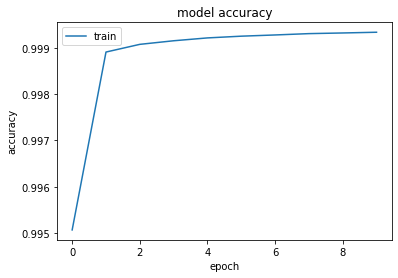

In [5]:
plt.plot(history.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

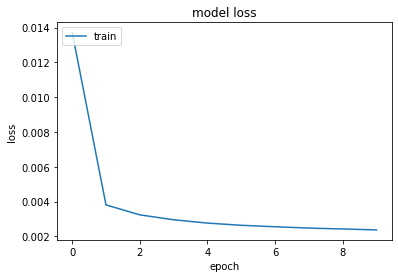

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
test_results = model.evaluate(testData, testDataLabels, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

156250/156250 [==============================] - 127s 813us/step - loss: 0.0031 - binary_accuracy: 0.9987
Test results - Loss: 0.003118484979495406 - Accuracy: 0.998660683631897%


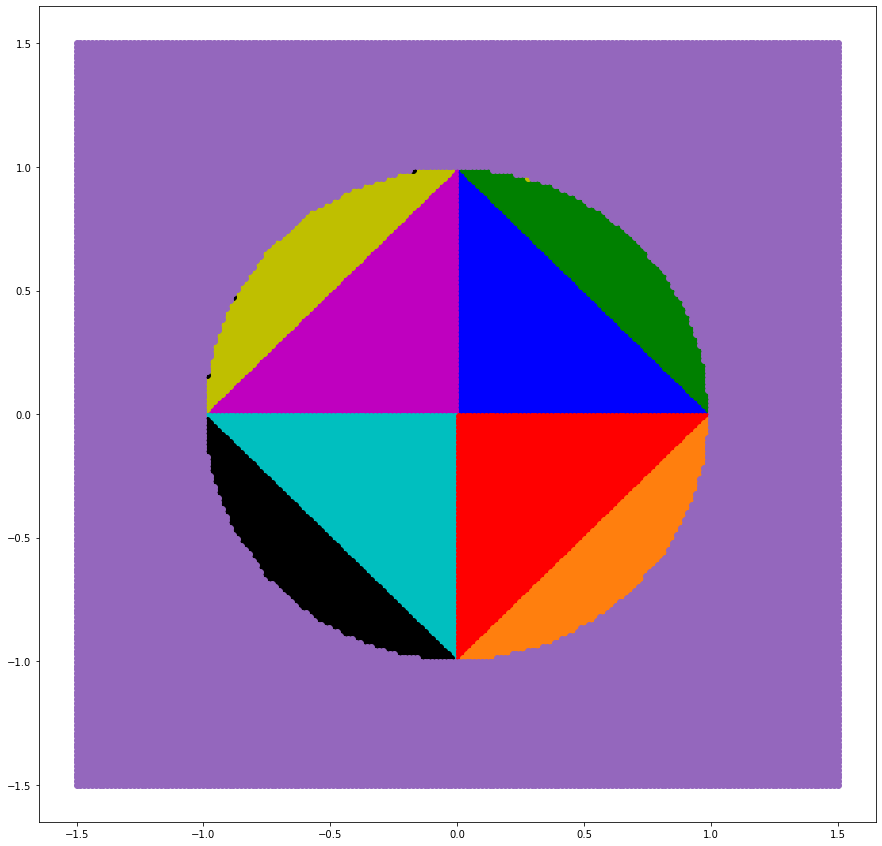

In [9]:
testx = np.linspace(-1.5,1.5,200)
testy = np.linspace(-1.5,1.5,200)
dataTest = []
for i in range(200):
  for j in range(200):
      dataTest.append([testx[i], testy[j]])  
prediction = []

prediction=(model.predict(np.array(dataTest)))
groupsTestx = [[],[],[],[],[],[],[],[],[]]
groupsTesty = [[],[],[],[],[],[],[],[], []]
for i in range(len(dataTest)):
    if(prediction[i][3]>=0.5):
        groupsTestx[8].append(dataTest[i][0])
        groupsTesty[8].append(dataTest[i][1])
    elif(prediction[i][0]>=0.5):
        if prediction[i][1] >= 0.5:
            if prediction[i][2]>=0.5:
                #111
                groupsTestx[6].append(dataTest[i][0])
                groupsTesty[6].append(dataTest[i][1])
            else:
                #110
                groupsTestx[7].append(dataTest[i][0])
                groupsTesty[7].append(dataTest[i][1])
        else:
            if prediction[i][2]>=0.5:
                #101
                groupsTestx[5].append(dataTest[i][0])
                groupsTesty[5].append(dataTest[i][1])
            else:
                #100
                groupsTestx[4].append(dataTest[i][0])
                groupsTesty[4].append(dataTest[i][1])
    else:
        if prediction[i][1] >= 0.5:
            if prediction[i][2]>=0.5:
                #011
                groupsTestx[2].append(dataTest[i][0])
                groupsTesty[2].append(dataTest[i][1])
            else:
                #010
                groupsTestx[3].append(dataTest[i][0])
                groupsTesty[3].append(dataTest[i][1])
        else:
            if prediction[i][2]>=0.5:
                #001
                groupsTestx[1].append(dataTest[i][0])
                groupsTesty[1].append(dataTest[i][1])
            else:
                #000
                groupsTestx[0].append(dataTest[i][0])
                groupsTesty[0].append(dataTest[i][1])
                
plt.rcParams['figure.figsize'] = [15, 15]
plt.scatter(groupsTestx[0],groupsTesty[0], c='b')
plt.scatter(groupsTestx[1],groupsTesty[1], c='m')
plt.scatter(groupsTestx[2],groupsTesty[2], c='c')
plt.scatter(groupsTestx[3],groupsTesty[3], c='r')
plt.scatter(groupsTestx[4],groupsTesty[4], c='g')
plt.scatter(groupsTestx[5],groupsTesty[5], c='y')
plt.scatter(groupsTestx[6],groupsTesty[6], c='k')
plt.scatter(groupsTestx[7],groupsTesty[7], c='tab:orange')
plt.scatter(groupsTestx[8],groupsTesty[8], c='tab:purple')
plt.show()